In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import scipy as sp
import pyccl as ccl
import theano
import theano.tensor as tt
import os
import utils
import make_data
from scipy.linalg import block_diag
%matplotlib inline

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# Settings

In [2]:
z_max = 1085
res = 300
x_arr = np.linspace(0, np.log(1+z_max), res)
dx = np.mean(np.diff(x_arr))
z_arr = np.exp(x_arr)-1
a_arr = 1./(1+z_arr)

path = '/home/jaimerz/PhD/Growz/data/products'


tools = utils.utils()
c = tools.c
data = make_data.make_data(z_max, res , path)


DESI = data.get_DESI(new=True)
WFIRST = data.get_WFIRST(new=True)
CC = data.get_CC(new=True)
DSS = data.get_DSS(new=True)
BOSS = data.get_BOSS(new=True)
eBOSS = data.get_eBOSS(new=True)
Wigglez = data.get_Wigglez(new=True)
DS17 = data.get_DS17(new=True)
CMB = data.get_CMB(new=True)
FCMB = data.get_FCMB(new=True)

In [3]:
n_samples = 100
n_tune = 100
datadict = {'DESI': DESI,
            'WFIRST': WFIRST,
            'CC': CC,
            'DS17': DS17, 
            'BOSS': BOSS,
            'eBOSS': eBOSS,
            'Wigglez': Wigglez,
            'DSS': DSS,
            'CMB': CMB, 
            'FCMB': FCMB}

datasets = ['CC', 'DS17', 'FCMB']

need_dM = ['DESI', 'BOSS', 'eBOSS', 'Wigglez', 'DS17']
need_fs8 = ['DESI', 'BOSS', 'eBOSS', 'Wigglez', 'DSS']
need_rd = ['BOSS', 'eBOSS', 'CMB']

if any(dataset in datasets for dataset in need_dM):
    get_dM=True 
else:
    get_dM=False
    
if any(dataset in datasets for dataset in need_fs8):
    get_fs8=True
else:
    get_fs8=False
    
if any(dataset in datasets for dataset in need_rd):
    get_rd = True
else:
    get_rd = False

In [4]:
data = np.array([])
data_cov = np.array([])
for dataset_name in datasets:
    dataset = datadict[dataset_name]
    data = np.concatenate([data, dataset['data']])
    data_cov = block_diag(data_cov, dataset['cov'])
data_cov = data_cov [1:]

# Plotting

In [5]:
Planck = tools.get_preds(z_arr, mode='Planck')

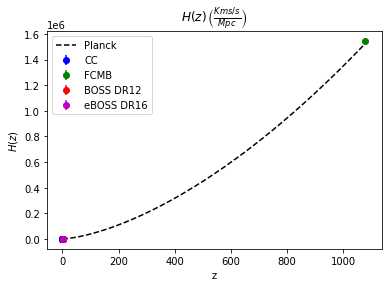

In [6]:
plt.plot(z_arr, Planck['Hkms_arr'], "k--", label='Planck')
plt.errorbar(CC['z'], CC['data'], yerr = CC['err'], fmt='bo', label='CC')
plt.errorbar(FCMB['z'], FCMB['data'], yerr = FCMB['err'], fmt='go', label='FCMB')
plt.errorbar(BOSS['z'], BOSS['para_data'], yerr=BOSS['para_err'], fmt='ro', label='BOSS DR12')
plt.errorbar(eBOSS['z'], c/1000/(eBOSS['para_data']*eBOSS['rd']), yerr = 1/eBOSS['rd']/(np.array([0.47])), fmt='mo', label='eBOSS DR16')


# axis labels and title
plt.xlabel("z")
plt.ylabel(r"$H(z)$")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();
os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_data.pdf')  

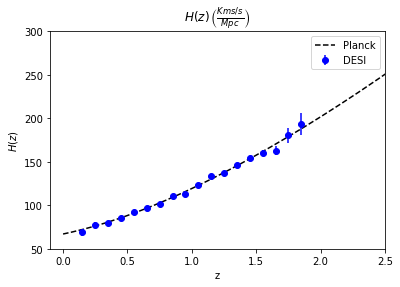

In [7]:
plt.plot(z_arr, Planck['Hkms_arr'], "k--", label='Planck')
plt.errorbar(DESI['z'], DESI['H_data'], yerr = DESI['H_err'], fmt='bo', label='DESI')


# axis labels and title
plt.xlim(-0.1, 2.5)
plt.ylim(50, 300)
plt.xlabel("z")
plt.ylabel(r"$H(z)$")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();
os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_forecast.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_forecast.pdf')  

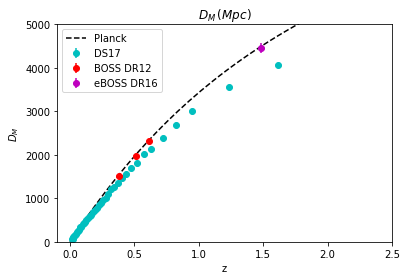

In [8]:
plt.plot(z_arr, Planck['dM_arr'], "k--", label='Planck')
plt.errorbar(DS17['z'], (10**((DS17['data']-25+19.2)/5))/(1+DS17['z']),
             yerr=(10**(DS17['err']/5))/(1+DS17['z']), fmt='co', label='DS17')
plt.errorbar(BOSS['z'], BOSS['perp_data'], yerr=BOSS['perp_err'], fmt='ro', label='BOSS DR12')
plt.errorbar(eBOSS['z'], eBOSS['perp_data']*eBOSS['rd'], yerr=np.array([0.79])*eBOSS['rd'], fmt='mo', label='eBOSS DR16')

# axis labels and title
plt.xlim(-0.1, 2.5)
plt.ylim(0, 5000)
plt.xlabel("z")
plt.ylabel(r"$D_M$")
plt.title(r"$D_M \, (Mpc)$")
plt.legend();
os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_data.pdf')  

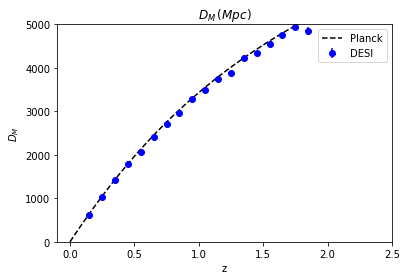

In [9]:
plt.plot(z_arr, Planck['dM_arr'], "k--", label='Planck')
plt.errorbar(DESI['z'], (1+DESI['z'])*DESI['dA_data'], yerr=DESI['dA_err'], fmt='bo', label='DESI')

# axis labels and title
plt.xlim(-0.1, 2.5)
plt.ylim(0, 5000)
plt.xlabel("z")
plt.ylabel(r"$D_M$")
plt.title(r"$D_M \, (Mpc)$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_forecast.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_forecast.pdf')  

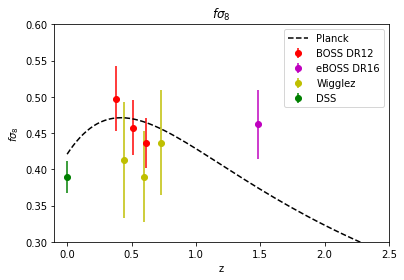

In [10]:
plt.plot(z_arr, Planck['f_arr']*Planck['s8_arr'], "k--", label='Planck')
plt.errorbar(BOSS['z'], BOSS['fs8_data'], yerr=BOSS['fs8_err'], fmt='ro', label='BOSS DR12')
plt.errorbar(eBOSS['z'], eBOSS['fs8_data'], yerr=eBOSS['fs8_err'], fmt='mo', label='eBOSS DR16')
plt.errorbar(Wigglez['z'], Wigglez['data'], yerr=Wigglez['err'], fmt='yo', label='Wigglez')
plt.errorbar(DSS['z'], DSS['data'], yerr=DSS['err'], fmt='go', label='DSS')


# axis labels and title
plt.xlim(-0.1, 2.5)
plt.ylim(0.3, 0.6)
plt.xlabel("z")
plt.ylabel(r"$f \sigma_8$")
plt.title(r"$f \sigma_8$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_data.pdf')  

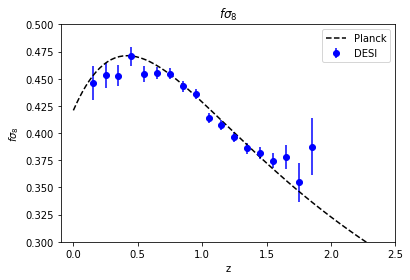

In [11]:
plt.plot(z_arr, Planck['f_arr']*Planck['s8_arr'], "k--", label='Planck')
plt.errorbar(DESI['z'], DESI['fs8_data'], yerr=DESI['fs8_err'], fmt='bo', label='DESI')


# axis labels and title
plt.xlim(-0.1, 2.5)
plt.ylim(0.3, 0.5)
plt.xlabel("z")
plt.ylabel(r"$f \sigma_8$")
plt.title(r"$f \sigma_8$")
plt.legend();
os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_forecast.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_forecast.pdf')  

# Model

In [12]:
with pm.Model() as model:
    ℓ = pm.InverseGamma("ℓ", alpha=1, beta=2) 
    η = pm.HalfNormal("η", sigma=10) 
    wm0 = pm.Uniform("wm0", 0.1, 0.2) 
    wL0 = pm.Uniform("wL0", 0.2, 0.4) 
    s80 = pm.Normal("s80", 0.8, 0.5)
    gp_cov = η ** 2 * pm.gp.cov.ExpQuad(1, ℓ) + pm.gp.cov.WhiteNoise(1e-3)
    gp = pm.gp.Latent(cov_func=gp_cov)
    
    #Mean of the gp
    H = pm.Deterministic('H', 100*tt.sqrt(wm0*(1+z_arr)**3+wL0))
    
    #Set up Gaussian process
    DH_gp = gp.prior("DH_gp", X=z_arr[:, None]) 
    H_gp = pm.Deterministic("H_gp", tt.as_tensor_variable(H+DH_gp))
    H0_gp = pm.Deterministic("H0_gp", tt.as_tensor_variable(H_gp[0]))
    
    if get_dM:
        dH_gp = pm.Deterministic("dH", tt.as_tensor_variable((c/1000)*(1+z_arr)/H_gp))
        dM_rec_gp = tt.zeros(len(z_arr))
        dM_rec_gp = tt.inc_subtensor(dM_rec_gp[1:],
                  tt.as_tensor_variable(dx*tt.cumsum(dH_gp)[:-1]))
        dM_trap_gp = tt.as_tensor_variable(0.5*(dM_rec_gp[1:]+dM_rec_gp[:-1]))
        dM_gp = pm.Deterministic('dM_gp', dM_trap_gp+0.5*dM_rec_gp[1]*tt.ones_like(dM_trap_gp))
        dA_gp = pm.Deterministic('dA_gp', dM_gp/(1+(z_arr[1:]+z_arr[:-1])/2))
        dL_gp = pm.Deterministic('dL_gp', dM_gp*(1+(z_arr[1:]+z_arr[:-1])/2))
        
    if get_rd:
        wb0 = pm.Normal("wb0", 0.02226, sigma=0.00023)
        theta27 = 2.755/2.7 
        zeq =  2.5 * 10**4 * wm0 * theta27**-4 
        keq = 7.46 * 10**-2 * wm0 * theta27**-2
        b1 = 0.313 * wm0**(-0.419) * (1 + 0.607 * wm0**(0.674))
        b2 = 0.238 * wm0**(0.223)
        zd = 1291 * ((wm0**0.251)/(1+0.659*wm0**0.828)) * (1+ b1*wb0**b2)
        Rd = 31.5 * wb0 * theta27**-4 * (zd/10*3)**-1
        Req = 31.5 * wb0 * theta27**-4 * (zeq/10*3)**-1
        rd_gp = pm.Deterministic('rd_gp',(2/(3*keq))*tt.sqrt(6/Req)*tt.log((tt.sqrt(1+Rd)+tt.sqrt(Rd+Req))/(1+tt.sqrt(Req))))
        
    if get_fs8:
        Wm0 =  pm.Deterministic('Wm0', wm0*(100/H_gp[0])**2)
        E_gp = pm.Deterministic('E_gp', H_gp/H_gp[0])
        
        d = tt.zeros(len(z_arr))
        y = tt.zeros(len(z_arr))
        d = tt.inc_subtensor(d[-1], a_arr[-1])
        y = tt.inc_subtensor(y[-1], E_gp[0]*a_arr[-1]**3)
        for i in np.arange(1, len(z_arr)):
            A0 = -1.5*Wm0/(a_arr[-i]*E_gp[-i])
            B0 = -1./(a_arr[-i]**2*E_gp[-i])
            A1 = -1.5*Wm0/(a_arr[-(i+1)]*E_gp[-(i+1)])
            B1 = -1./(a_arr[-(i+1)]**2*E_gp[-(i+1)])
            y = tt.inc_subtensor(y[-(i+1)], (1-0.5*dx**2*A0*B0)*y[-i]-0.5*(A0+A1)*dx*d[-i])
            d = tt.inc_subtensor(d[-(i+1)], -0.5*(B0+B1)*dx*y[-i]+(1-0.5*dx**2*A0*B0)*d[-i])
        
        fs8 = pm.Deterministic('fs8', s80*y/(a_arr**2*E_gp*d[0]))
        s8 = pm.Deterministic('s8', s80*d/d[0])
    
    theory = tt.as_tensor_variable([])

In [13]:
if 'DESI' in datasets:
    print('Adding DESI')
    with model:
        DESI_H = pm.Deterministic('DESI_H',
                 tt.as_tensor_variable(H_gp[DESI['idx']]+(H_gp[DESI['idx']+1]-H_arr[DESI['idx']])*DESI['U']))
        DESI_dA = pm.Deterministic('DESI_dA',
                  tt.as_tensor_variable(dA_gp[DESI['idx']]+(dA_gp[DESI['idx']+1]-dA_gp[DESI['idx']])*DESI['U']))
        DESI_fs8 = pm.Deterministic('DESI_fs8',
                   tt.as_tensor_variable(fs8_gp[DESI['idx']]+(fs8_gp[DESI['idx']+1]-fs8_gp[DESI['idx']])*DESI['U']))
        theory = tt.concatenate([theory, DESI_H, DESI_dA, DESI_fs8])
        
if 'WFIRST' in datasets:
    print('Adding WFIRST')
    with model:
        WFIRST_E = pm.Deterministic('WFIRST_E',
                   tt.as_tensor_variable(E_gp[WFIRST['idx']]+(E_gp[WFIRST['idx']+1]-E_gp[WFIRST['idx']])*WFIRST['U']))
        theory = tt.concatenate([theory, WFIRST_E])

if 'CC' in datasets:
    print('Adding CCs')
    with model:
        CC_H = pm.Deterministic("CC_H",
               tt.as_tensor_variable(H_gp[CC['idx']]+(H_gp[CC['idx']+1]-H_gp[CC['idx']])*CC['U']))
        theory = tt.concatenate([theory, CC_H])
        
if 'DS17' in datasets:
    print('Adding Pantheon')
    with model:
        M = pm.Normal('M', mu=-19.0, sigma=3)
        u_gp = pm.Deterministic('u_gp', tt.as_tensor_variable(5*tt.log10(dL_gp)+25+M))
        DS17_u = pm.Deterministic("DS17_u",
                 tt.as_tensor_variable(u_gp[DS17['idx']]+(u_gp[DS17['idx']+1]-u_gp[DS17['idx']])*DS17['U']))
        theory = tt.concatenate([theory, DS17_u])
        
if 'BOSS' in datasets:
    print('Adding BOSS')
    with model:
        #Get alpha_perp and alpha_para 
        B_para_f = pm.Deterministic("B_para_f", H_gp*rd_gp/BOSS['rd'])
        B_perp_f = pm.Deterministic("B_perp_f", dM_gp*BOSS['rd']/rd_gp)
        
        B_para = pm.Deterministic("B_para", 
                    tt.as_tensor_variable(B_para_f[BOSS['idx']]+(B_para_f[BOSS['idx']+1]-B_para_f[BOSS['idx']])*BOSS['U']))
        B_perp = pm.Deterministic("B_perp", 
                tt.as_tensor_variable(B_perp_f[BOSS['idx']]+(B_perp_f[BOSS['idx']+1]-B_perp_f[BOSS['idx']])*BOSS['U']))
        B_fs8 = pm.Deterministic("B_fs8", 
                   tt.as_tensor_variable(fs8_gp[BOSS['idx']]+(fs8_gp[BOSS['idx']+1]-fs8_gp[BOSS['idx']])*BOSS['U']))
        
        theory = tt.concatenate([theory, B_para, B_perp, B_fs8])
        
if 'eBOSS' in datasets:
    print('Adding eBOSS')
    with model:
        eB_para_f = pm.Deterministic("eB_para_f", dH_gp/rd_gp)
        eB_perp_f = pm.Deterministic("eB_perp_f", dM_gp/rd_gp)
        
        eB_para = pm.Deterministic("eB_para", 
                    tt.as_tensor_variable(eB_para_f[eBOSS['idx']]+(eB_para_f[eBOSS['idx']+1]-eB_para_f[eBOSS['idx']])*eBOSS['U']))
        eB_perp = pm.Deterministic("eB_perp", 
                tt.as_tensor_variable(eB_perp_f[eBOSS['idx']]+(eB_perp_f[BOSS['idx']+1]-eB_perp_f[eBOSS['idx']])*eBOSS['U']))
        eB_fs8 = pm.Deterministic("eB_fs8", 
                   tt.as_tensor_variable(fs8_gp[eBOSS['idx']]+(fs8_gp[eBOSS['idx']+1]-fs8_gp[eBOSS['idx']])*eBOSS['U']))
        
        theory = tt.concatenate([theory, eB_para, eB_perp, eB_fs8])

if 'Wigglez' in datasets:
    print('Adding Wigglez')
    with model:
        Wigglez_fs8 = pm.Deterministic("Wigglez_fs8",
                    tt.as_tensor_variable(fs8_gp[Wigglez['idx']]+(fs8_gp[Wigglez['idx']+1]-fs8_gp[Wigglez['idx']])*Wigglez['U']))
        theory = tt.concatenate([theory, Wigglez_fs8])

if 'DSS' in datasets:
    print('Adding DSS')
    with model:
        DSS_fs8 = pm.Deterministic("fs8_eBOSS", tt.as_tensor_variable(fs8_gp[DSS['idx']]))
        theory = tt.concatenate([theory, DSS_fs8])

if 'CMB' in datasets:
    print('Adding CMB')
    with model:
        CMB_dM = pm.Deterministic('CMB_dM',
                  tt.as_tensor_variable(dM_gp[CMB['idx']]+(dM_gp[CMB['idx']+1]-dM_gp[CMB['idx']])*CMB['U']))
        t100 = pm.Deterministic("theta100", tt.as_tensor_variable(100*rd_gp/CMB_dM))
        theory = tt.concatenate([theory, theta100])
        
if 'FCMB' in datasets:
    print('Adding FCMB')
    with model:
        CMB_H = pm.Deterministic('CMB_H',
                  tt.as_tensor_variable(H_gp[FCMB['idx']]+(H_gp[FCMB['idx']+1]-H_gp[FCMB['idx']])*FCMB['U']))
        theory = tt.concatenate([theory, CMB_H])
        
with model:
    lkl= pm.MvNormal("lkl", mu=theory, cov=data_cov, observed=data)
    trace = pm.sample(n_samples, return_inferencedata=True, tune=n_tune)


Adding CCs
Adding Pantheon
Adding FCMB


Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [M, DH_gp_rotated_, s80, wL0, wm0, η, ℓ]


Sampling 4 chains for 100 tune and 100 draw iterations (400 + 400 draws total) took 3097 seconds.
The acceptance probability does not match the target. It is 0.8991193929693899, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The acceptance probability does not match the target. It is 0.8982952720056195, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The acceptance probability does not match the target. It is 0.8985387458240577, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The acceptance probability does not match the target. It is 0.9040983380535708, but should be close to 0.8. Try to increas

In [14]:
pm.summary(trace)['r_hat'][["ℓ","η"]]

ℓ    1.0
η    1.0
Name: r_hat, dtype: float64

No handles with labels found to put in legend.


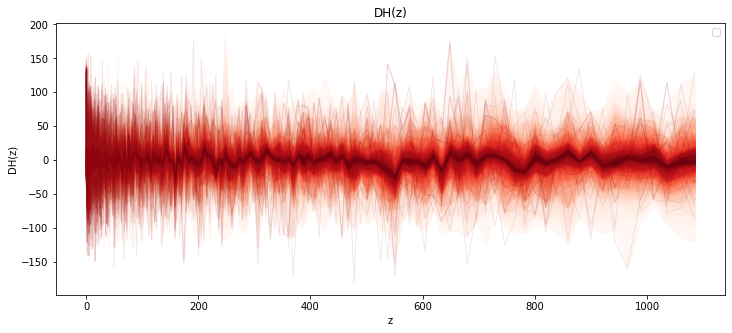

In [15]:
# plot the results
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()

# plot the samples from the gp posterior with samples and shading
from pymc3.gp.util import plot_gp_dist

plot_gp_dist(ax, trace.posterior["DH_gp"][0, :, :], z_arr[:, None])

# axis labels and title
plt.xlabel("z")
plt.ylabel("DH(z)")
plt.title("DH(z)")
plt.legend();

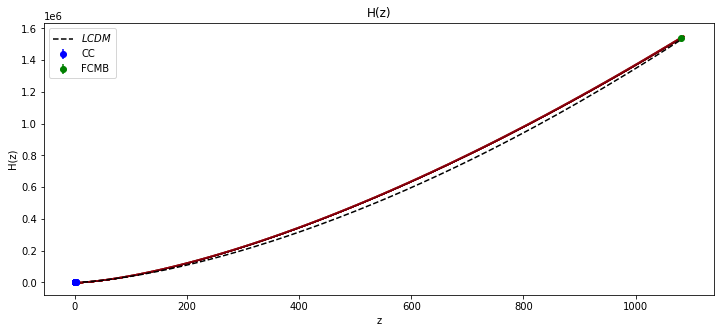

In [16]:
# plot the results
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()

# plot the samples from the gp posterior with samples and shading
from pymc3.gp.util import plot_gp_dist

plot_gp_dist(ax, trace.posterior["H_gp"][0, :, :], z_arr[:, None])
ax.plot(z_arr[:, None], Planck['Hkms_arr'], "k--", label=r'$LCDM$')

# plot the data and the true latent function
#ax.plot(z_arr_f[:, None], H_arr_f, "dodgerblue", lw=3, label=r'$LCDM$')
if 'CC' in datasets:
    plt.errorbar(CC['z'], CC['data'], yerr = CC['err'], fmt='bo', label='CC')
if 'FCMB' in datasets:
    plt.errorbar(FCMB['z'], FCMB['data'], yerr = FCMB['err'], fmt='go', label='FCMB')
if 'BOSS' in datasets:
    plt.errorbar(BOSS['z'], BOSS['para_data'], yerr=BOSS['para_err'], fmt='ro', label='BOSS')
if 'eBOSS' in datasets:
    plt.errorbar(eBOSS['z'], c/1000/(eBOSS['para_data']*eBOSS['rd']), yerr = 1/eBOSS['rd']/(np.array([0.47])), fmt='mo', label='eBOSS')


# axis labels and title
plt.xlabel("z")
plt.ylabel("H(z)")
plt.title("H(z)")
plt.legend();

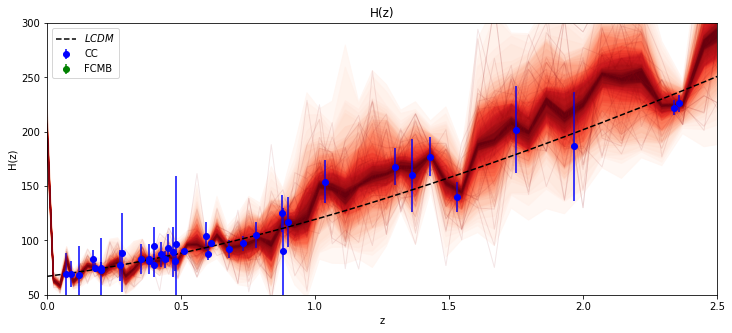

In [17]:
# plot the results
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()

# plot the samples from the gp posterior with samples and shading
from pymc3.gp.util import plot_gp_dist

plot_gp_dist(ax, trace.posterior["H_gp"][0, :, :], z_arr[:, None])
ax.plot(z_arr[:, None], Planck['Hkms_arr'], "k--", label=r'$LCDM$')

# plot the data and the true latent function
#ax.plot(z_arr_f[:, None], H_arr_f, "dodgerblue", lw=3, label=r'$LCDM$')
if 'CC' in datasets:
    plt.errorbar(CC['z'], CC['data'], yerr = CC['err'], fmt='bo', label='CC')
if 'FCMB' in datasets:
    plt.errorbar(FCMB['z'], FCMB['data'], yerr = FCMB['err'], fmt='go', label='FCMB')
if 'BOSS' in datasets:
    plt.errorbar(BOSS['z'], BOSS['para_data'], yerr=BOSS['para_err'], fmt='ro', label='BOSS')
if 'eBOSS' in datasets:
    plt.errorbar(eBOSS['z'], c/1000/(eBOSS['para_data']*eBOSS['rd']), yerr = 1/eBOSS['rd']/(np.array([0.47])), fmt='mo', label='eBOSS')


# axis labels and title
plt.xlim(0, 2.5)
plt.ylim(50, 300)
plt.xlabel("z")
plt.ylabel("H(z)")
plt.title("H(z)")
plt.legend();

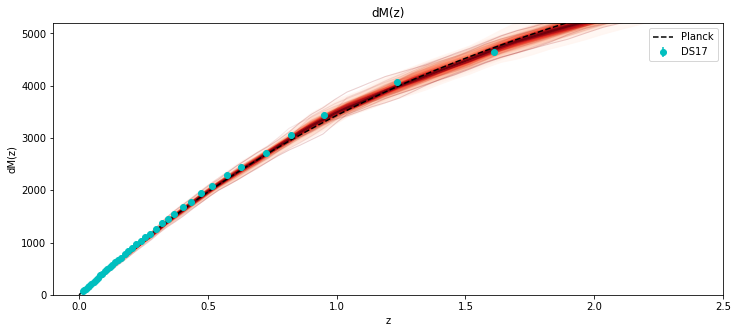

In [23]:
# plot the results
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()

# plot the samples from the gp posterior with samples and shading
from pymc3.gp.util import plot_gp_dist

plot_gp_dist(ax, trace.posterior["dM_gp"][0, :, :],
             ((z_arr[1:]+z_arr[:-1])/2)[:, None])

plt.plot(z_arr, Planck['dM_arr'], "k--", label='Planck')
if 'DS17' in datasets:
    plt.errorbar(DS17['z'], (10**((DS17['data']-25+19.49)/5))/(1+DS17['z']),
             yerr=(10**(DS17['err']/5))/(1+DS17['z']), fmt='co', label='DS17')
if 'BOSS' in datasets:
    plt.errorbar(BOSS['z'], BOSS['perp_data'], yerr=BOSS['perp_err'], fmt='ro', label='BOSS')
if 'eBOSS' in datasets:
    plt.errorbar(eBOSS['z'], eBOSS['perp_data']*eBOSS['rd'], yerr=np.array([0.79])*eBOSS['rd'], fmt='mo', label='eBOSS')
#if 'CMB' in datasets:
#    plt.errorbar(CMB['z'], 100*CMB['rd']/CMB['data'], yerr=1/CMB['err'], fmt='mo', label='eBOSS')

# axis labels and title
plt.xlim(-0.1, 2.5)
plt.ylim(0, 5200)
plt.xlabel("z")
plt.ylabel("dM(z)")
plt.title("dM(z)")
plt.legend();

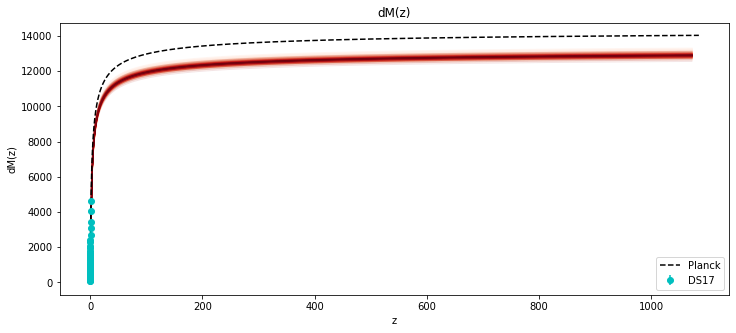

In [21]:
# plot the results
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()

# plot the samples from the gp posterior with samples and shading
from pymc3.gp.util import plot_gp_dist

plot_gp_dist(ax, trace.posterior["dM_gp"][0, :, :],
             ((z_arr[1:]+z_arr[:-1])/2)[:, None])

plt.plot(z_arr, Planck['dM_arr'], "k--", label='Planck')
if 'DS17' in datasets:
    plt.errorbar(DS17['z'], (10**((DS17['data']-25+19.49)/5))/(1+DS17['z']),
             yerr=(10**(DS17['err']/5))/(1+DS17['z']), fmt='co', label='DS17')
if 'BOSS' in datasets:
    plt.errorbar(BOSS['z'], BOSS['perp_data'], yerr=BOSS['perp_err'], fmt='ro', label='BOSS')
if 'eBOSS' in datasets:
    plt.errorbar(eBOSS['z'], eBOSS['perp_data']*eBOSS['rd'], yerr=np.array([0.79])*eBOSS['rd'], fmt='mo', label='eBOSS')
#if 'CMB' in datasets:
#    plt.errorbar(CMB['z'], 100*CMB['rd']/CMB['data'], yerr=1/CMB['err'], fmt='mo', label='eBOSS')

# axis labels and title

plt.xlabel("z")
plt.ylabel("dM(z)")
plt.title("dM(z)")
plt.legend();

In [ ]:
# plot the results
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()

# plot the samples from the gp posterior with samples and shading
from pymc3.gp.util import plot_gp_dist

plot_gp_dist(ax, trace.posterior["fs8_gp"][0, :, :],
             z_arr[:, None])

plt.plot(z_arr, Planck['f_arr']*Planck['s8_arr'], "k--", label='Planck')
if 'BOSS' in datasets:
    plt.errorbar(BOSS['z'], BOSS['fs8_data'], yerr=BOSS['fs8_err'], fmt='ro', label='BOSS')
if 'eBOSS' in datasets:
    plt.errorbar(eBOSS['z'], eBOSS['fs8_data'], yerr=eBOSS['fs8_err'], fmt='mo', label='eBOSS')
if 'Wigglez' in datasets:
    plt.errorbar(Wigglez['z'], Wigglez['data'], yerr=Wigglez['err'], fmt='yo', label='Wigglez')
if 'DSS' in datasets:
    plt.errorbar(DSS['z'], DSS['data'], yerr=DSS['err'], fmt='go', label='DSS')


# axis labels and title
plt.xlabel("z")
plt.ylabel("fs8(z)")
plt.title("fs8(z)")
plt.legend();

In [ ]:
# plot the results
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()

# plot the samples from the gp posterior with samples and shading
from pymc3.gp.util import plot_gp_dist

plot_gp_dist(ax, (trace.posterior["s8_gp"])[0, :, :],
             z_arr[:, None])

# plot the data and the true latent function
ax.plot(z_arr[:, None], Planck['s8_arr'], "k--", label=r'$LCDM$')

# axis labels and title
plt.xlabel("z")
plt.ylabel("sigma8(z)")
plt.title("sigma8(z)")
plt.legend();

In [ ]:
#Save
filename = ''
for dataset in datasets:
    filename+=dataset+'_'
path = filename+'{}_{}_t'.format(n_samples, n_tune)

n = np.array(trace.posterior["η"]).flatten()
l = np.array(trace.posterior["ℓ"]).flatten()
DHz = np.array(trace.posterior["DH_gp"])
DHz = DHz.reshape(-1, DHz.shape[-1])
Hz =np.array(trace.posterior["H_gp"])
Hz = Hz.reshape(-1, Hz.shape[-1])
H0 = np.array(trace.posterior["H0_gp"]).flatten()

if get_dM:
    dMz = np.array(trace.posterior["dM_gp"])
    dMz = dMz.reshape(-1, dMz.shape[-1])
else:
    dMz = None
    
if get_fs8:
    s8z = np.array(trace.posterior["s8_gp"])
    s8z = s8z.reshape(-1, s8z.shape[-1])
    fs8z = np.array(trace.posterior["fs8_gp"])
    fs8z = fs8z.reshape(-1, fs8z.shape[-1])
    Omega_m = np.array(trace.posterior["Wm0"]).flatten()
    s80 = np.array(trace.posterior["s80"]).flatten()
    S80 = s80*np.sqrt(Omega_m/0.3)
else: 
    s8z = None 
    fs8z = None
    Omega_m = None 
    s80 = None
    S80 = None

if 'DS17' in datasets:
    M = np.array(trace.posterior["M"]).flatten()
else:
    M = None

os.mkdir(path)
np.savez(os.path.join(path,'samples.npz'), 
         z_arr = z_arr,
         n=n,
         l=l,
         DHz = DHz,
         Hz=Hz,
         dMz=dMz,
         s8z=s8z,
         fs8z=fs8z,
         H0=H0,
         Omega_m=Omega_m,
         Omega_b=Omega_b,
         s80=s80,
         S80=S80)